In [ ]:
import os
import pandas as pd
from typing import List, Dict, Tuple, Any
import pickle  # Use pickle to load the model


# Print the current working directory to ensure it's correct
print("Current working directory:", os.getcwd())

# Define the paths relative to the notebook's current directory
# = os.getcwd()

# Print the resolved paths for debugging
VENUE_ODI_PATH =  os.path.join(os.path.dirname(__file__), '../data/processed/ODI/venue_odi.csv')
RECENT_ODI_PATH = os.path.join(os.path.dirname(__file__), '../data/processed/ODI/recent_odi.csv')
CAREER_ODI_PATH = os.path.join(os.path.dirname(__file__), '../data/processed/ODI/career_odi.csv')
PLAYER_MATCH_DATA_ODI_PATH = os.path.join(os.path.dirname(__file__), '../data/processed/ODI/player_match_data_odi.csv')

career_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "career_batsman_total_runs_odi": "int",  # Career total runs would be numeric.
    "career_batsman_100s_odi": "int",  # Career 100s, numeric.
    "career_batsman_50s_odi": "int",  # Career 50s, numeric.
    "career_batsman_total_sixes_odi": "int",  # Career sixes, numeric.
    "career_batsman_total_fours_odi": "int",  # Career fours, numeric.
    "career_batsman_average_runs_odi": "float64",  # Career batting average, numeric.
    "career_batsman_strike_rate_odi": "float64",  # Career strike rate, numeric.
    "career_bowler_wickets_odi": "int",  # Career wickets, numeric.
    "career_bowler_average_odi": "float64",  # Career bowler average, numeric.
    "career_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "career_fielder_total_catches_odi": "int",  # Career catches, numeric.
    "career_fielder_total_runouts_odi": "int"  # Career runouts, numeric.
}

recent_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "recent_batsman_total_runs_odi": "int",  # Recent total runs would be numeric.
    "recent_batsman_100s_odi": "int",  # Recent 100s, numeric.
    "recent_batsman_50s_odi": "int",  # Recent 50s, numeric.
    "recent_batsman_total_sixes_odi": "int",  # Recent sixes, numeric.
    "recent_batsman_total_fours_odi": "int",  # Recent fours, numeric.
    "recent_batsman_average_runs_odi": "float64",  # Recent batting average, numeric.
    "recent_batsman_strike_rate_odi": "float64",  # Recent strike rate, numeric.
    "recent_bowler_wickets_odi": "int",  # Recent wickets, numeric.
    "recent_bowler_average_odi": "float64",  # Recent bowler average, numeric.
    "recent_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "recent_fielder_total_catches_odi": "int",  # Recent catches, numeric.
    "recent_fielder_total_runouts_odi": "int"  # Recent runouts, numeric.
}

venue_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "venue_batsman_total_runs_odi": "int",  # Venue total runs would be numeric.
    "venue_batsman_100s_odi": "int",  # Venue 100s, numeric.
    "venue_batsman_50s_odi": "int",  # Venue 50s, numeric.
    "venue_batsman_total_sixes_odi": "int",  # Venue sixes, numeric.
    "venue_batsman_total_fours_odi": "int",  # Venue fours, numeric.
    "venue_batsman_average_runs_odi": "float64",  # Venue batting average, numeric.
    "venue_batsman_strike_rate_odi": "float64",  # Venue strike rate, numeric.
    "venue_bowler_wickets_odi": "int",  # Venue wickets, numeric.
    "venue_bowler_average_odi": "float64",  # Venue bowler average, numeric.
    "venue_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "venue_fielder_total_catches_odi": "int",  # Venue catches, numeric.
    "venue_fielder_total_runouts_odi": "int"  # Venue runouts, numeric.
}

player_dict = {
    "match_id": "string",         # Match ID is usually alphanumeric, so it should be a string.
    "player_id": "string",        # Player ID can be alphanumeric, stored as a string.
    "player_name": "string",      # Player name is a string, which can contain spaces and special characters.
    "fantasy_points": "float64",  # Fantasy points are numeric values, represented as float.
    "team_name": "string",        # Team name is a string, as it can contain letters, numbers, and spaces.
    "role": "string",             # Player role is usually a categorical string (e.g., "Batsman", "Bowler").     
    "venue": "string"             # Venue is a string, usually the name of the stadium or city.
}


career_data=pd.read_csv(CAREER_ODI_PATH,dtype=career_dict)
venue_data=pd.read_csv(VENUE_ODI_PATH,dtype=venue_dict)
recent_data=pd.read_csv(RECENT_ODI_PATH,dtype=recent_dict)
player_match_data=pd.read_csv(PLAYER_MATCH_DATA_ODI_PATH,dtype=player_dict)

def generate_tuple_from_data(data: pd.DataFrame, player_id: str, match_id: str) -> Tuple:
    """
    Generate a tuple from the given data based on player_id and match_id.
    If no matching data is found, return a tuple of length 10 filled with 0s.
    """
    # print(f"Generating tuple for player_id={player_id} and match_id={match_id}")  # Debugging line
    matching_data = data[(data['player_id'] == player_id) & (data['match_id'] == match_id)]
    
    if matching_data.empty:
        print(f"No matching data found for player_id={player_id} and match_id={match_id}")  # Debugging line
        return tuple([0] * (len(data.columns) - 2))  # Return a tuple with zeros if no match is found (excluding player_id and match_id)
    
    # Extract the relevant data as a tuple (excluding player_id and match_id)
    # print(f"Found matching data for player_id={player_id} and match_id={match_id}: {matching_data.iloc[0].values}")  # Debugging line
    return tuple(matching_data.iloc[0].drop(['player_id', 'match_id']).values)

def calculate_player_features(player_id: str, match_date: str, venue: str, feature_names: Dict[str, List[str]]) -> List[float]:
    """
    Calculate the feature vector for a player based on player_id, match_date, and venue.
    This should return a list of features (numerical values) for the player.
    """
    # Convert the 'date' column to datetime format for easier comparison
    player_match_data['date'] = pd.to_datetime(player_match_data['date'])
    input_date = pd.to_datetime(match_date)
    
    # Filter player match data for the given player_id
    player_data = player_match_data[player_match_data['player_id'] == player_id]
    
    # Try to find the match_id with the closest date <= input date (regardless of venue)
    try:
        match_id_1 = player_data[player_data['date'] <= input_date].sort_values(by='date', ascending=False).iloc[0]['match_id']
    except IndexError:
        match_id_1 = None  # No match found for career stats
    
    # Try to find the match_id with the closest date <= input date and matching the input venue
    try:
        match_id_2 = player_data[(player_data['date'] <= input_date) & (player_data['venue'] == venue)].sort_values(by='date', ascending=False).iloc[0]['match_id']
    except IndexError:
        match_id_2 = None  # No match found for recent form or venue

    # Initialize tuples to be empty in case match_ids can't be determined
    career_tuple = tuple([0] * (14 - 2))
    recent_form_tuple = tuple([0] * (14 - 2))
    venue_tuple = tuple([0] * (14 - 2))

    # Generate the career tuple only if match_id_1 is valid
    if match_id_1:
        career_tuple = generate_tuple_from_data(career_data, player_id, match_id_1)
    
    # Generate the recent form tuple only if match_id_2 is valid
        recent_form_tuple = generate_tuple_from_data(recent_data, player_id, match_id_1)
    
    # Generate the venue tuple only if match_id_2 is valid (because match_id_2 is venue-specific)
    if match_id_2:
        venue_tuple = generate_tuple_from_data(venue_data, player_id, match_id_2)
    
    # Combine the tuples to form the feature vector
    feature_vector = list(career_tuple) + list(recent_form_tuple) + list(venue_tuple)
    
    return feature_vector


def generate_features_for_all_players(players_data: List[dict], match_date: str, venue: str) -> pd.DataFrame:
    """
    Generate feature vectors for all players based on the provided list of player data, match date, and venue.
    Returns a DataFrame with player_id, player_name, and corresponding feature values.
    """
    
    
    # Extract feature names by removing player_id and match_id
    career_feature_names = [col for col in career_data.columns if col not in ['player_id', 'match_id']]
    recent_feature_names = [col for col in recent_data.columns if col not in ['player_id', 'match_id']]
    venue_feature_names = [col for col in venue_data.columns if col not in ['player_id', 'match_id']]
    
    # Combine all feature names
    all_feature_names = career_feature_names + recent_feature_names + venue_feature_names
    # print(f"All feature names: {all_feature_names}")  # Debugging line
    
    feature_rows = []  # List to store feature rows for DataFrame
    
    # Loop through each player in the list
    for player in players_data:
        player_id = player['player_id']
        player_name = player['player_name']
        
        # Step 1: Calculate feature vector for the player
        feature_vector = calculate_player_features(player_id, match_date, venue, all_feature_names)
        
        # Step 2: Append each feature with the player_id, player_name, and corresponding feature name to feature_rows
        for i, feature_value in enumerate(feature_vector):
            feature_name = all_feature_names[i]  # Get actual feature name
            feature_rows.append({
                'player_id': player_id,
                'player_name': player_name,
                'feature_name': feature_name,
                'feature_value': feature_value
            })
    
    # Step 3: Convert the feature rows to a pandas DataFrame
    features_df = pd.DataFrame(feature_rows)

    # Pivot the DataFrame to get the desired output format: player_id, player_name, feature_1, feature_2, ...
    features_df_pivot = features_df.pivot_table(index=['player_id', 'player_name'], columns='feature_name', values='feature_value', aggfunc='first')

    # Reset index to flatten the DataFrame
    features_df_pivot.reset_index(inplace=True)

    # Explicitly reorder columns to maintain the order of features as in 'all_feature_names'
    features_df_pivot = features_df_pivot[['player_id', 'player_name'] + all_feature_names]

    # Optional: You can print or debug the resulting DataFrame to verify the order
    # print(f"Generated feature rows for all players:\n{features_df_pivot.head()}")

    
    return features_df_pivot

def predict_fantasy_points_for_all_players(players_df: pd.DataFrame) -> pd.DataFrame:
    """
    Predict the fantasy points for all players given their feature vectors.
    
    Args:
    - players_df (pd.DataFrame): A DataFrame containing player data (player_id, player_name, and feature columns).
    
    Returns:
    - pd.DataFrame: A DataFrame with player_id, player_name, and predicted fantasy points for each player.
    """
    try:
        # print("Starting the prediction process...")

        # Load the pre-trained model (replace with the correct path to your model)
        # print("Loading the pre-trained model...")
        with open(os.path.join(os.path.dirname(__file__), '../model_artifacts/ODI/model_odi_HBR.pkl'), 'rb') as model_file:
            model = pickle.load(model_file)  # Load the model using pickle
        # print("Model loaded successfully.")

        # Extract features from the DataFrame (assuming the feature columns start from the 3rd column onward)
        feature_columns = players_df.columns[2:]  # Skip player_id and player_name
        # print(f"Extracted feature columns: {feature_columns}")

        # Check if the correct number of features are present
        # print(f"Number of features in input DataFrame: {len(feature_columns)}")
        # print("Input DataFrame preview:")
        # print(players_df.head())

        # Predict fantasy points for all players
        # print("Predicting fantasy points for all players...")
        predicted_fantasy_points = model.predict(players_df[feature_columns])
        # print(f"Predictions completed. Number of predictions: {len(predicted_fantasy_points)}")

        # Add predicted fantasy points to the DataFrame
        players_df['predicted_fantasy_points'] = predicted_fantasy_points
        # print("Predicted fantasy points added to DataFrame.")

        # Create the resulting DataFrame with only player_id, player_name, and predicted_fantasy_points
        results_df = players_df[['player_id', 'player_name', 'predicted_fantasy_points']]
        # print("Result DataFrame created with player_id, player_name, and predicted_fantasy_points.")

        # Display preview of results
        # print("Result DataFrame preview:")
        # print(results_df.head())
        
        return results_df
    
    except Exception as e:
        
        print(f"Error while loading model or predicting fantasy points: {e}")
        return pd.DataFrame(columns=['player_id', 'player_name', 'predicted_fantasy_points'])
    
def generate_recommended_team(players: List[Dict[str, Any]]) -> List[Dict[str, Any]]:
    """
    Generate a recommended team based on predicted fantasy points and team diversity.
    The team should contain 11 players with the highest predicted fantasy points, while maintaining role diversity 
    and ensuring no more than 5 players from one team.
    
    Args:
    - players (List[Dict[str, Any]]): List of players with player_id, player_name, team_name, role, and predicted_fantasy_points.
    
    Returns:
    - List[Dict[str, Any]]: A list of 11 recommended players for the dream team, including their role and predicted fantasy points.
    """
    try:
        # Step 1: Pick one player from each role based on predicted fantasy points
        selected_players = []
        for role in ["Batsman", "Bowler", "Wicket-Keeper", "All-Rounder"]:
            role_players = [p for p in players if p["role"] == role]
            if role_players:
                selected_players.append(max(role_players, key=lambda x: x["predicted_fantasy_points"]))

        # Step 2: Select remaining players to make a team of 11
        remaining_players = [p for p in players if p not in selected_players]
        remaining_players.sort(key=lambda x: x["predicted_fantasy_points"], reverse=True)

        while len(selected_players) < 11:
            next_player = remaining_players.pop(0)
            selected_players.append(next_player)

        # Step 3: Ensure team diversity (max 5 players from one team)
        team_counts = pd.DataFrame(selected_players)["team_name"].value_counts()
        if team_counts.max() > 5:
            # If a team has more than 5 players, replace the lowest fantasy point player with the highest fantasy point player from the other team
            for team in team_counts.index:
                if team_counts[team] > 5:
                    # Identify the players from the overrepresented team
                    overrepresented_players = [p for p in selected_players if p["team_name"] == team]
                    # Identify the player with the lowest predicted fantasy points
                    lowest_fantasy_player = min(overrepresented_players, key=lambda x: x["predicted_fantasy_points"])
                    # Find the best available player from a different team
                    available_players = [p for p in players if p["team_name"] != team and p not in selected_players]
                    replacement_player = max(available_players, key=lambda x: x["predicted_fantasy_points"])
                    # Replace the lowest fantasy point player with the new player
                    selected_players.remove(lowest_fantasy_player)
                    selected_players.append(replacement_player)
                    break

        # Step 4: Sort selected players by predicted fantasy points
        selected_players.sort(key=lambda x: x["predicted_fantasy_points"], reverse=True)

        # Return the selected players as the final recommended team
        return selected_players

    except Exception as e:
        print(f"Error in generating recommended team: {e}")
        return []


def generate_dream_team(players_data: List[dict], match_date: str, venue: str, tournament_type: str) -> List[Dict[str, Any]]:
    """
    Generate the recommended dream team for a given squad, match date, venue, and tournament type.
    
    Args:
    - players_data (List[dict]): List of players with player_id, player_name, team_name, role, etc.
    - match_date (str): The match date in 'YYYY-MM-DD' format.
    - venue (str): The venue of the match.
    - tournament_type (str): Type of tournament ('ODI', 'T20', etc.)
    
    Returns:
    - List[Dict[str, Any]]: The dream team with player_name, role, predicted_points, isCaptain, isViceCaptain, and team_name.
    """
    
    # Generate player features based on the provided match date and venue
    players_df = generate_features_for_all_players(players_data, match_date, venue)
    
    # Predict the fantasy points for all players
    predicted_points_df = predict_fantasy_points_for_all_players(players_df)
    
    # Convert players_data into a DataFrame to easily join on player_id
    players_data_df = pd.DataFrame(players_data)
    
    # Join the predicted points with players_data to get role and team_name
    merged_df = pd.merge(predicted_points_df, players_data_df[['player_id', 'role', 'team_name']], on='player_id', how='left')
    
    # Prepare the data for team generation (convert to list of dictionaries)
    players = merged_df[['player_name', 'role', 'team_name', 'predicted_fantasy_points']].to_dict(orient='records')
    
    # Generate the recommended team
    recommended_team = generate_recommended_team(players)
    
    # Sort players by predicted points in descending order
    recommended_team.sort(key=lambda x: x['predicted_fantasy_points'], reverse=True)
    
    # convert recommended_team to dataframe
    # merge with players df
    # generate shap values
    # append shap values

    # Assign captain and vice-captain roles
    if len(recommended_team) > 0:
        recommended_team[0]['is_captain'] = True
        recommended_team[0]['is_vice_captain'] = False
    if len(recommended_team) > 1:
        recommended_team[1]['is_captain'] = False
        recommended_team[1]['is_vice_captain'] = True
    # Mark the rest of the players as False for both captain and vice-captain
    for player in recommended_team[2:]:
        player['is_captain'] = False
        player['is_vice_captain'] = False
    
    # Rename predicted_fantasy_points to predicted_points after generating the team
    for player in recommended_team:
        player['predicted_points'] = player.pop('predicted_fantasy_points')
    
    return recommended_team, players_df, predicted_points_df, players_data_df, merged_df, players

In [2]:
career_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "career_batsman_total_runs_odi": "int",  # Career total runs would be numeric.
    "career_batsman_100s_odi": "int",  # Career 100s, numeric.
    "career_batsman_50s_odi": "int",  # Career 50s, numeric.
    "career_batsman_total_sixes_odi": "int",  # Career sixes, numeric.
    "career_batsman_total_fours_odi": "int",  # Career fours, numeric.
    "career_batsman_average_runs_odi": "float64",  # Career batting average, numeric.
    "career_batsman_strike_rate_odi": "float64",  # Career strike rate, numeric.
    "career_bowler_wickets_odi": "int",  # Career wickets, numeric.
    "career_bowler_average_odi": "float64",  # Career bowler average, numeric.
    "career_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "career_fielder_total_catches_odi": "int",  # Career catches, numeric.
    "career_fielder_total_runouts_odi": "int"  # Career runouts, numeric.
}

recent_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "recent_batsman_total_runs_odi": "int",  # Recent total runs would be numeric.
    "recent_batsman_100s_odi": "int",  # Recent 100s, numeric.
    "recent_batsman_50s_odi": "int",  # Recent 50s, numeric.
    "recent_batsman_total_sixes_odi": "int",  # Recent sixes, numeric.
    "recent_batsman_total_fours_odi": "int",  # Recent fours, numeric.
    "recent_batsman_average_runs_odi": "float64",  # Recent batting average, numeric.
    "recent_batsman_strike_rate_odi": "float64",  # Recent strike rate, numeric.
    "recent_bowler_wickets_odi": "int",  # Recent wickets, numeric.
    "recent_bowler_average_odi": "float64",  # Recent bowler average, numeric.
    "recent_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "recent_fielder_total_catches_odi": "int",  # Recent catches, numeric.
    "recent_fielder_total_runouts_odi": "int"  # Recent runouts, numeric.
}

venue_dict = {
    "match_id": "string",  # Match ID is usually a string type, as it may contain letters or special characters.
    "player_id": "string",  # Player ID could be an alphanumeric string or a number stored as a string.
    "venue_batsman_total_runs_odi": "int",  # Venue total runs would be numeric.
    "venue_batsman_100s_odi": "int",  # Venue 100s, numeric.
    "venue_batsman_50s_odi": "int",  # Venue 50s, numeric.
    "venue_batsman_total_sixes_odi": "int",  # Venue sixes, numeric.
    "venue_batsman_total_fours_odi": "int",  # Venue fours, numeric.
    "venue_batsman_average_runs_odi": "float64",  # Venue batting average, numeric.
    "venue_batsman_strike_rate_odi": "float64",  # Venue strike rate, numeric.
    "venue_bowler_wickets_odi": "int",  # Venue wickets, numeric.
    "venue_bowler_average_odi": "float64",  # Venue bowler average, numeric.
    "venue_bowler_economy_rate_odi": "float64",  # Economy rate, numeric.
    "venue_fielder_total_catches_odi": "int",  # Venue catches, numeric.
    "venue_fielder_total_runouts_odi": "int"  # Venue runouts, numeric.
}

player_dict = {
    "match_id": "string",         # Match ID is usually alphanumeric, so it should be a string.
    "player_id": "string",        # Player ID can be alphanumeric, stored as a string.
    "player_name": "string",      # Player name is a string, which can contain spaces and special characters.
    "fantasy_points": "float64",  # Fantasy points are numeric values, represented as float.
    "team_name": "string",        # Team name is a string, as it can contain letters, numbers, and spaces.
    "role": "string",             # Player role is usually a categorical string (e.g., "Batsman", "Bowler").     
    "venue": "string"             # Venue is a string, usually the name of the stadium or city.
}




In [3]:
import pandas as pd

file1_path = '../data/processed/ODI/career_odi.csv'
file2_path = '../data/processed/ODI/recent_odi.csv'
file3_path = '../data/processed/ODI/venue_odi.csv'
file4_path = '../data/processed/ODI/player_match_data_odi.csv'



df1 = pd.read_csv(file1_path,dtype=career_dict)
df2 = pd.read_csv(file2_path,dtype=recent_dict)
df3 = pd.read_csv(file3_path,dtype=venue_dict)
df4 = pd.read_csv(file4_path,dtype=player_dict,parse_dates=["date"])

In [4]:
# Perform the inner merge on 'match_id' and 'player_id' for all four DataFrames
merged_df = pd.merge(df1, df2, on=['match_id', 'player_id'], how='inner')
merged_df = pd.merge(merged_df, df3, on=['match_id', 'player_id'], how='inner')
merged_df = pd.merge(merged_df, df4, on=['match_id', 'player_id'], how='inner')

# The final DataFrame after all merges
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   match_id                          96096 non-null  string        
 1   player_id                         96096 non-null  string        
 2   career_batsman_total_runs_odi     96096 non-null  int64         
 3   career_batsman_100s_odi           96096 non-null  int64         
 4   career_batsman_50s_odi            96096 non-null  int64         
 5   career_batsman_total_sixes_odi    96096 non-null  int64         
 6   career_batsman_total_fours_odi    96096 non-null  int64         
 7   career_batsman_average_runs_odi   96096 non-null  float64       
 8   career_batsman_strike_rate_odi    96096 non-null  float64       
 9   career_bowler_wickets_odi         96096 non-null  int64         
 10  career_bowler_average_odi         96096 non-nu

In [5]:
# Convert 'date' column to datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Split the DataFrame based on the condition (date <= June 30, 2024)
split_date = pd.to_datetime('2024-06-30')

merged_df_before_june = merged_df[merged_df['date'] <= split_date]
merged_df_after_june = merged_df[merged_df['date'] > split_date]

In [5]:
from sklearn.linear_model import HuberRegressor
from sklearn.preprocessing import StandardScaler

# Drop columns that are not part of X_train
columns_to_drop = ['match_id', 'player_id', 'player_name', 'fantasy_points', 'team_name', 'role', 'date','venue']
X_train = merged_df_before_june.drop(columns=columns_to_drop)

# Extract the target variable (fantasy_points)
y_train = merged_df_before_june['fantasy_points']

# # Standardize the features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the Huber Regressor model
model = HuberRegressor()

# Fit the model to the scaled training data
model.fit(X_train, y_train)

# After training, you can check the coefficients and intercept
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_}")


Model coefficients: [-0.00399698  0.14998038  0.22132816 -0.1996454   0.06046547  0.13583188
  0.04786693 -0.05038904 -0.12352863  1.05553389  0.12256883 -0.1015469
  0.02153055 -0.01016079 -0.021502   -0.23100399 -0.03465313  0.13461303
  0.05983825  2.49745371  0.09639578  1.26483689  0.43561966  0.08626131
 -0.00851653  0.00518674  0.00299524 -0.03993475 -0.02080066  0.03153957
  0.01814635  0.45798312 -0.06548231  0.40208879  0.07965693 -0.01358925]
Model intercept: 0.5613825940137742


c:\Python312\Lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [5]:
import shap

c:\CODING\code\competitions\Inter-IIT-Tech-Meet-13\Dream-11\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import pickle
import shap
shap.initjs()
columns_to_drop = ['match_id', 'player_id', 'player_name', 'fantasy_points', 'team_name', 'role', 'date','venue']
X_train = merged_df_before_june.drop(columns=columns_to_drop)

path = "../model_artifacts/ODI/model_odi_HBR.pkl"
# Load the model from the file
with open(path, 'rb') as file:
    model_odi = pickle.load(file)

# def model_predict(X):
#     return model_odi.predict(X)

# Use SHAP's KernelExplainer
explainer = shap.KernelExplainer(model_odi.predict, X_train[67564:67564 + 11])  # X_train is your training data
shap_values = explainer.shap_values(X_train[67564:67564 + 11])

# Visualize SHAP values
# shap.summary_plot(shap_values, X_train.iloc[2876])
# X_train.head()

c:\CODING\code\competitions\Inter-IIT-Tech-Meet-13\Dream-11\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\CODING\code\competitions\Inter-IIT-Tech-Meet-13\Dream-11\.venv\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator HuberRegressor from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
100%|██████████| 11/11 [00:01<00:00,  9.16it/s]


36
min(shap_values[10])=np.float64(-4.899076529301256)
max(shap_values[10])=np.float64(4.195130524109451)
-10.770778291870743
-3.175348093535317
0.8872874221536149
Sum of SHAP values for instance 0: -13.058838963252445
1.8123100925865878
-10.101372942703808
-1.2000104968712386
Sum of SHAP values for instance 1: -9.489073346988459
6.5538420795940455
-6.443108787139321
-1.200010496871243
Sum of SHAP values for instance 2: -1.0892772044165189
0.4097963982518342
0.6556870033336469
-0.19787667228720418
Sum of SHAP values for instance 3: 0.8676067292982771
-12.355477263465492
18.839221801262493
2.639642691844783
Sum of SHAP values for instance 4: 9.123387229641784
-0.09599874690261544
22.748459007038324
2.296954155517466
Sum of SHAP values for instance 5: 24.949414415653173
-2.512383943765024
-12.96640288864536
-1.200010496871262
Sum of SHAP values for instance 6: -16.678797329281647
8.989720428711282
-0.44225520335737206
-1.2000104968712533
Sum of SHAP values for instance 7: 7.3474547284826

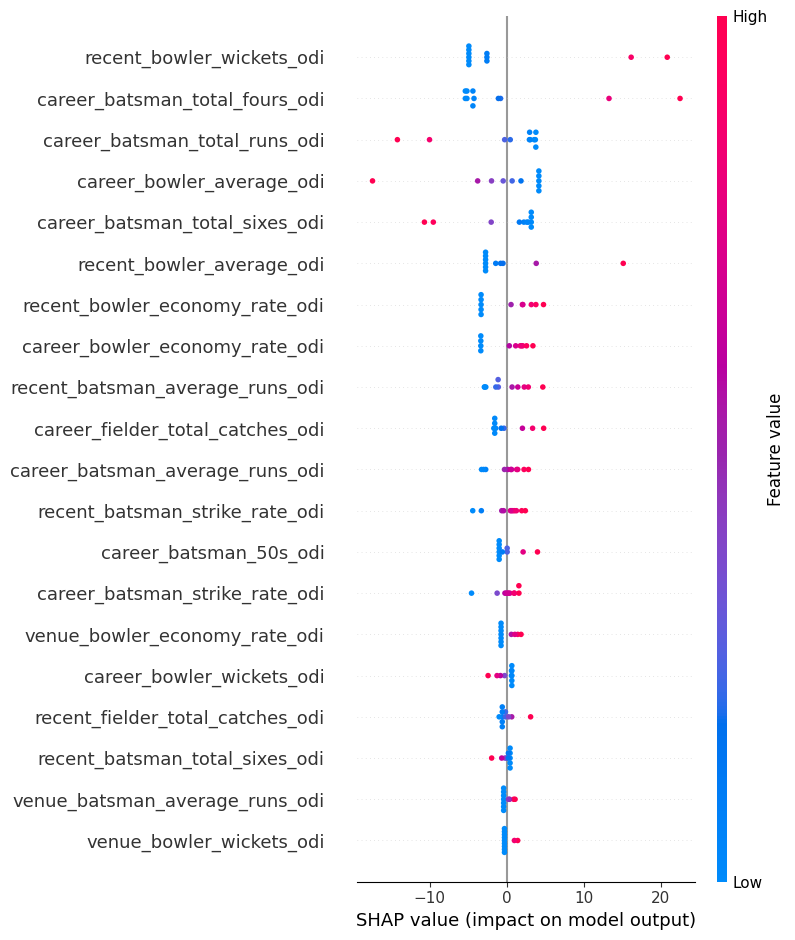

In [7]:
print(len(shap_values[0]))
print(f"{min(shap_values[10])=}")
print(f"{max(shap_values[10])=}")
# Assuming shap_values is a list of SHAP values for each instance (with 36 features per instance)
# Example: shap_values[i] is a list of 36 SHAP values for instance i

for i in range(11):  # Looping over each instance
    sum_shap = 0  # Initialize the sum for each instance

    # Sum SHAP values for features in the range 0 to 11 (inclusive)
    sum_sh_0_12 = sum(shap_values[i][0:12])
    print(sum_sh_0_12)

    # Sum SHAP values for features in the range 12 to 23 (inclusive)
    sum_sh_12_24 = sum(shap_values[i][12:24])
    print(sum_sh_12_24)

    # Sum SHAP values for features in the range 24 to 35 (inclusive)
    sum_sh_24_36 = sum(shap_values[i][24:36])
    print(sum_sh_24_36)

    # Total sum of SHAP values for the instance
    sum_shap = sum_sh_0_12 + sum_sh_12_24 + sum_sh_24_36

    # Print the total sum for each instance
    print(f"Sum of SHAP values for instance {i}: {sum_shap}")

#print(shap_values)
shap.summary_plot(shap_values, X_train[67564:67564+11])

In [8]:
X_train[67564:67564+11]  # Check the first 10 predictions

,career_batsman_total_runs_odi,career_batsman_100s_odi,career_batsman_50s_odi,career_batsman_total_sixes_odi,career_batsman_total_fours_odi,career_batsman_average_runs_odi,career_batsman_strike_rate_odi,career_bowler_wickets_odi,career_bowler_average_odi,career_bowler_economy_rate_odi,...,venue_batsman_50s_odi,venue_batsman_total_sixes_odi,venue_batsman_total_fours_odi,venue_batsman_average_runs_odi,venue_batsman_strike_rate_odi,venue_bowler_wickets_odi,venue_bowler_average_odi,venue_bowler_economy_rate_odi,venue_fielder_total_catches_odi,venue_fielder_total_runouts_odi
67564,1,0,0,0,0,1.000000,16.666667,1,64.000000,4.571429,...,0,0,0,0.0,50.000000,0,0.000000,5.750000,0,0
67565,161,0,0,5,14,23.000000,96.407186,0,0.000000,0.000000,...,0,0,0,0.0,0.000000,0,0.000000,0.000000,0,0
67566,3533,11,24,72,396,35.686869,88.925245,33,49.515152,5.176346,...,0,0,0,0.0,0.000000,0,0.000000,0.000000,0,0
67567,2714,1,15,66,265,29.824176,96.309439,69,37.333333,5.494490,...,0,2,4,44.0,104.761905,0,0.000000,0.000000,0,0
67568,167,0,2,2,16,41.750000,77.674419,1,174.000000,6.000000,...,1,1,5,50.0,81.967213,0,0.000000,6.888889,0,0
67569,798,2,5,27,61,34.695652,88.079470,43,18.697674,3.739535,...,0,1,2,26.0,92.857143,4,10.500000,4.754717,1,0
67570,3,0,0,0,0,3.000000,75.000000,0,0.000000,0.000000,...,0,0,0,0.0,0.000000,0,0.000000,0.000000,0,0
67571,46,0,0,0,3,46.000000,59.740260,0,0.000000,6.833333,...,0,0,0,0.0,0.000000,0,0.000000,0.000000,0,0
67572,655,0,5,8,65,26.200000,81.265509,0,0.000000,0.000000,...,0,0,2,21.0,58.333333,0,0.000000,0.000000,4,0
67573,15,0,0,0,3,5.000000,78.947368,21,27.952381,5.344461,...,0,0,0,0.0,0.000000,3,10.666667,3.555556,0,0


In [9]:
shap_values

array([[ 3.81063008e+00, -1.78979599e-01, -9.61814921e-01,
         3.20784299e+00, -5.36110474e+00, -3.25211890e+00,
        -4.55604887e+00,  6.38453399e-01, -3.75475775e+00,
         1.18236802e+00, -1.65744824e+00,  1.12200234e-01,
        -2.13126971e-01,  1.75026144e-03,  1.11287004e-02,
         4.54802854e-01,  2.71039514e-01, -2.84379230e+00,
        -3.27778569e+00, -2.55603993e+00,  3.85217866e+00,
         2.11335551e+00, -9.66784885e-01, -2.20738238e-02,
        -3.32240007e-03,  0.00000000e+00, -2.60628858e-04,
         1.37708719e-02,  2.12084073e-02, -3.80928607e-01,
        -2.39388905e-02, -2.73397235e-01,  1.18171881e-01,
         1.45010126e+00, -3.41172336e-02,  0.00000000e+00],
       [ 2.99542296e+00, -1.78979599e-01, -9.61814921e-01,
         2.24373717e+00, -4.37471271e+00, -2.72778290e-01,
         1.60591238e+00,  6.83185803e-01,  4.19513052e+00,
        -3.34724321e+00, -6.97872942e-01, -7.76770854e-02,
        -7.97427817e-02,  1.75026144e-03,  1.11287004e-

In [6]:
# X_test and y_test for merged_df_after_june
X_test = merged_df_after_june.drop(columns=columns_to_drop)
y_test = merged_df_after_june['fantasy_points']

# # Initialize the StandardScaler
scaler = StandardScaler()


# # Transform X_test with the already fitted scaler
X_test_scaled = scaler.fit_transform(X_test)

# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# You can now compare y_pred with y_test to evaluate the model's performance


NameError: name 'columns_to_drop' is not defined

In [13]:

# Make predictions on X_test
y_pred = model.predict(X_test)

# Create a new DataFrame with the necessary columns
predictions_df = merged_df_after_june[['match_id', 'player_id', 'player_name', 'fantasy_points', 'role', 'team_name']].copy()

# Add the predicted fantasy points to the DataFrame
predictions_df['predicted_fantasy_points'] = y_pred

# Rename the fantasy_points column to actual_fantasy_points
predictions_df.rename(columns={'fantasy_points': 'actual_fantasy_points'}, inplace=True)

# Save the DataFrame to a CSV file
output_file = "Results/ODI/predicted_fantasy_points_odi.csv"  # You can change the file path as needed
predictions_df.to_csv(output_file, index=False)

print(f"Predictions saved to {output_file}")


Predictions saved to Results/ODI/predicted_fantasy_points_odi.csv


In [14]:
import pandas as pd

# Input File (Predicted Fantasy Points)
input_file = "Results/ODI/predicted_fantasy_points_odi.csv"

# Output File
output_file = "Results/ODI/dream_team_with_predicted_fantasy_points.csv"

# Columns for Output
output_columns = [
    "match_id", "player_id", "player_name", "actual_fantasy_points", "role", "team_name", "predicted_fantasy_points"
]

# Read Data
data = pd.read_csv(input_file)

# Prepare Output Data
output_data = []

# Define Dream Team Calculation Logic
def calculate_dream_team(players):
    try:
        # Step 1: Pick one player from each role based on predicted fantasy points
        selected_players = []
        for role in ["Batsman", "Bowler", "Wicket-Keeper", "All-Rounder"]:
            role_players = [p for p in players if p["role"] == role]
            if role_players:
                selected_players.append(max(role_players, key=lambda x: x["predicted_fantasy_points"]))

        # Step 2: Select remaining players to make a team of 11
        remaining_players = [p for p in players if p not in selected_players]
        remaining_players.sort(key=lambda x: x["predicted_fantasy_points"], reverse=True)

        while len(selected_players) < 11:
            next_player = remaining_players.pop(0)
            selected_players.append(next_player)

        # Step 3: Ensure team diversity (max 5 players from one team)
        team_counts = pd.DataFrame(selected_players)["team_name"].value_counts()
        if team_counts.max() == 11:
            # Replace the lowest fantasy point player with the highest fantasy point player from the other team
            other_team = [team for team in players[0]["team_name"].unique() if team not in team_counts.index][0]
            lowest_fantasy_player = min(selected_players, key=lambda x: x["predicted_fantasy_points"])
            replacement_player = max(
                [p for p in players if p["team_name"] == other_team and p not in selected_players],
                key=lambda x: x["predicted_fantasy_points"]
            )
            selected_players.remove(lowest_fantasy_player)
            selected_players.append(replacement_player)

        # Step 4: Sort selected players by predicted fantasy points
        selected_players.sort(key=lambda x: x["predicted_fantasy_points"], reverse=True)

        return selected_players, "Optimal"

    except Exception as e:
        print(f"Error in calculating dream team: {e}")
        return None, "Error"

# Process Matches
i = 1
for match_id, match_group in data.groupby("match_id"):
    # Extract only necessary columns (player_id, role, team_name, predicted_fantasy_points)
    players = match_group[['match_id', 'player_id', 'player_name', 'actual_fantasy_points', 'role', 'team_name', 'predicted_fantasy_points']].to_dict(orient="records")
    
    # Calculate Dream Team
    selected_team, status = calculate_dream_team(players)

    if selected_team is None or len(selected_team) != 11:
        # If selected_team is None or doesn't have exactly 11 players, log the error
        with open("matches_where_team_could_not_be_formed.txt", 'a') as file:
            file.write(f"{status}, {match_id}, {len(selected_team) if selected_team else 'None'}, {selected_team if selected_team else 'None'}\n")
        i += 1
        continue

    # Prepare Row for Output
    for player in selected_team:
        row = [
            match_id,
            player["player_id"],
            player["player_name"],
            player["actual_fantasy_points"],
            player["role"],
            player["team_name"],
            player["predicted_fantasy_points"]
        ]
        output_data.append(row)

    if i % 100 == 0:
        print(f"Processed {i} matches...")
    i += 1

# Write Output to CSV
output_df = pd.DataFrame(output_data, columns=output_columns)
output_df.to_csv(output_file, index=False)

print(f"Dream Team details saved to {output_file}")



Processed 100 matches...
Processed 200 matches...
Dream Team details saved to Results/ODI/dream_team_with_predicted_fantasy_points.csv


In [15]:
import pandas as pd

# Input File (Predicted Fantasy Points)
input_file = "Results/ODI/predicted_fantasy_points_odi.csv"

# Output File
output_file = "Results/ODI/dream_team_with_actual_fantasy_points.csv"

# Columns for Output
output_columns = [
    "match_id", "player_id", "player_name", "actual_fantasy_points", "role", "team_name", "predicted_fantasy_points"
]

# Read Data
data = pd.read_csv(input_file)

# Prepare Output Data
output_data = []

# Define Dream Team Calculation Logic
def calculate_dream_team(players):
    try:
        # Step 1: Pick one player from each role based on predicted fantasy points
        selected_players = []
        for role in ["Batsman", "Bowler", "Wicket-Keeper", "All-Rounder"]:
            role_players = [p for p in players if p["role"] == role]
            if role_players:
                selected_players.append(max(role_players, key=lambda x: x["actual_fantasy_points"]))

        # Step 2: Select remaining players to make a team of 11
        remaining_players = [p for p in players if p not in selected_players]
        remaining_players.sort(key=lambda x: x["actual_fantasy_points"], reverse=True)

        while len(selected_players) < 11:
            next_player = remaining_players.pop(0)
            selected_players.append(next_player)

        # Step 3: Ensure team diversity (max 5 players from one team)
        team_counts = pd.DataFrame(selected_players)["team_name"].value_counts()
        if team_counts.max() == 11:
            # Replace the lowest fantasy point player with the highest fantasy point player from the other team
            other_team = [team for team in players[0]["team_name"].unique() if team not in team_counts.index][0]
            lowest_fantasy_player = min(selected_players, key=lambda x: x["actual_fantasy_points"])
            replacement_player = max(
                [p for p in players if p["team_name"] == other_team and p not in selected_players],
                key=lambda x: x["actual_fantasy_points"]
            )
            selected_players.remove(lowest_fantasy_player)
            selected_players.append(replacement_player)

        # Step 4: Sort selected players by predicted fantasy points
        selected_players.sort(key=lambda x: x["actual_fantasy_points"], reverse=True)

        return selected_players, "Optimal"

    except Exception as e:
        print(f"Error in calculating dream team: {e}")
        return None, "Error"

# Process Matches
i = 1
for match_id, match_group in data.groupby("match_id"):
    # Extract only necessary columns (player_id, role, team_name, actual_fantasy_points)
    players = match_group[['match_id', 'player_id', 'player_name', 'actual_fantasy_points', 'role', 'team_name', 'predicted_fantasy_points']].to_dict(orient="records")
    
    # Calculate Dream Team
    selected_team, status = calculate_dream_team(players)

    if selected_team is None or len(selected_team) != 11:
        # If selected_team is None or doesn't have exactly 11 players, log the error
        with open("matches_where_team_could_not_be_formed.txt", 'a') as file:
            file.write(f"{status}, {match_id}, {len(selected_team) if selected_team else 'None'}, {selected_team if selected_team else 'None'}\n")
        i += 1
        continue

    # Prepare Row for Output
    for player in selected_team:
        row = [
            match_id,
            player["player_id"],
            player["player_name"],
            player["actual_fantasy_points"],
            player["role"],
            player["team_name"],
            player["predicted_fantasy_points"]
        ]
        output_data.append(row)

    if i % 100 == 0:
        print(f"Processed {i} matches...")
    i += 1

# Write Output to CSV
output_df = pd.DataFrame(output_data, columns=output_columns)
output_df.to_csv(output_file, index=False)

print(f"Dream Team details saved to {output_file}")



Processed 100 matches...
Processed 200 matches...
Dream Team details saved to Results/ODI/dream_team_with_actual_fantasy_points.csv


In [16]:
import pandas as pd

# File paths for the input files
predicted_file = "Results/ODI/dream_team_with_predicted_fantasy_points.csv"
actual_file = "Results/ODI/dream_team_with_actual_fantasy_points.csv"

# Output file path
output_file = "Results/ODI/dream_team_summary.csv"

# Read the data from the two files
predicted_df = pd.read_csv(predicted_file)
actual_df = pd.read_csv(actual_file)

# Initialize list to store the summary for each match_id
summary_data = []

# Function to calculate the sum of fantasy points (with captain and vice-captain multipliers)
def calculate_team_points(team_df):
    team_df = team_df.sort_values(by='predicted_fantasy_points', ascending=False)  # Sort by predicted points (or actual, depending on case)
    
    total_points = 0
    if len(team_df) >= 1:
        # Highest points player (Captain)
        total_points += team_df.iloc[0]['predicted_fantasy_points'] * 2
    if len(team_df) >= 2:
        # Second highest points player (Vice-Captain)
        total_points += team_df.iloc[1]['predicted_fantasy_points'] * 1.5
    
    # Add the rest normally
    total_points += team_df.iloc[2:]['predicted_fantasy_points'].sum()

    return total_points

# Iterate through the unique match IDs
for match_id in predicted_df['match_id'].unique():
    # Get the predicted dream team for the current match_id
    predicted_team = predicted_df[predicted_df['match_id'] == match_id]

    # Get the actual dream team for the current match_id
    actual_team = actual_df[actual_df['match_id'] == match_id]

    # Calculate the sum of actual and predicted points for both teams
    predicted_team_points = calculate_team_points(predicted_team)
    actual_team_points_predicted = calculate_team_points(actual_team)
    
    # Add the match summary to the summary_data list
    summary_data.append({
        'match_id': match_id,
        'sum_predicted_points_predicted_team': predicted_team_points,
        'sum_predicted_points_actual_team': actual_team_points_predicted,
        'sum_actual_points_predicted_team': predicted_team['actual_fantasy_points'].sum(),
        'sum_actual_points_actual_team': actual_team['actual_fantasy_points'].sum()
    })

# Create a DataFrame from the summary_data
summary_df = pd.DataFrame(summary_data)

# Write the summary data to a CSV file
summary_df.to_csv(output_file, index=False)

print(f"Summary saved to {output_file}")


Summary saved to Results/ODI/dream_team_summary.csv


In [17]:
import pandas as pd

# Load the dream_team_summary.csv file into a DataFrame
summary_file = "Results/ODI/dream_team_summary.csv"
df = pd.read_csv(summary_file)

# Calculate the percentage errors for each match
df['%error_predicted_actual'] = abs(df['sum_actual_points_predicted_team'] - df['sum_actual_points_actual_team']) / df['sum_actual_points_actual_team'] * 100
df['%error_predicted_predicted'] = abs(df['sum_predicted_points_predicted_team'] - df['sum_actual_points_actual_team']) / df['sum_actual_points_actual_team'] * 100

# Calculate the mean of the percentage errors
mean_error_predicted_actual = df['%error_predicted_actual'].mean()
mean_error_predicted_predicted = df['%error_predicted_predicted'].mean()

# Print the results with the percentage errors
print("Percentage Errors for each match:")
print(df[['match_id', '%error_predicted_actual', '%error_predicted_predicted']])

# Print the mean errors
print(f"\nMean % error between predicted team actual points and actual team actual points: {mean_error_predicted_actual:.2f}%")
print(f"Mean % error between predicted team predicted points and actual team actual points: {mean_error_predicted_predicted:.2f}%")

# Save the updated DataFrame to the same CSV file
df.to_csv(summary_file, index=False)

# Optionally, save to a new file if you don't want to overwrite the original
# df.to_csv("Results/dream_team_summary_with_errors.csv", index=False)


Percentage Errors for each match:
     match_id  %error_predicted_actual  %error_predicted_predicted
0     1385700                54.252199                   45.676891
1     1385701                49.156355                   36.638655
2     1385702                32.638889                   36.572282
3     1385703                39.030303                   27.199030
4     1385704                45.197740                   39.791149
..        ...                      ...                         ...
216   1457466                53.238547                   17.916184
217   1457467                25.652842                   24.502945
218   1457468                30.148883                   37.680379
219   1457469                39.172749                   34.923600
220   1458411                50.210379                   37.545945

[221 rows x 3 columns]

Mean % error between predicted team actual points and actual team actual points: 33.07%
Mean % error between predicted team predicted poi

SAVE THE MODEL

In [39]:
import pickle
with open('../model_artifacts/ODI/model_odi_HBR.pkl', 'wb') as f:
    pickle.dump(model, f)